In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Horizontal & Vertical Flip**

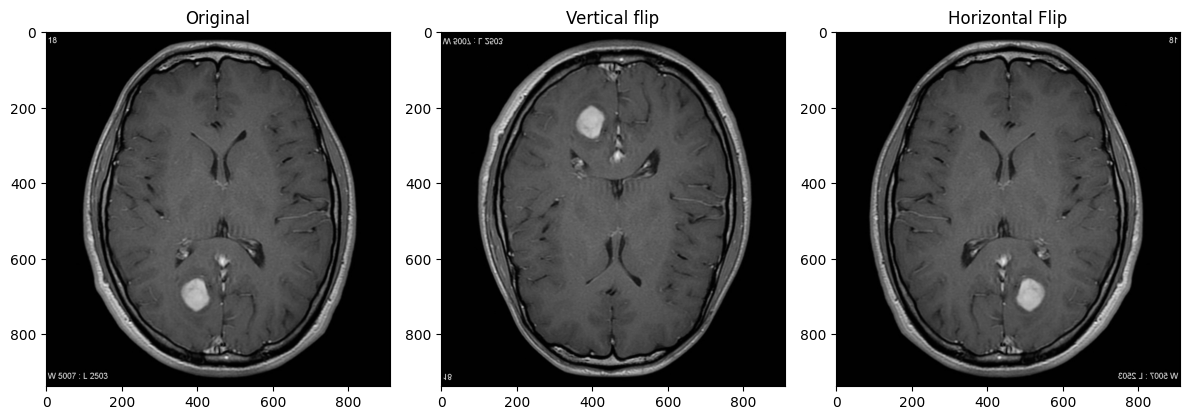

In [24]:
image_path = '/content/drive/MyDrive/Medical_Image/brain.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Vertical_flip = cv2.flip(image, 0)
Horizon_flip = cv2.flip(image, 1)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(Vertical_flip, cmap='gray')
plt.title("Vertical flip")

plt.subplot(1,3,3)
plt.imshow(Horizon_flip, cmap='gray')
plt.title("Horizontal Flip")


plt.tight_layout()
plt.show()

# **Rotation** **on** **Vertical** **Flip**

Text(0.5, 1.0, 'Rotated Image')

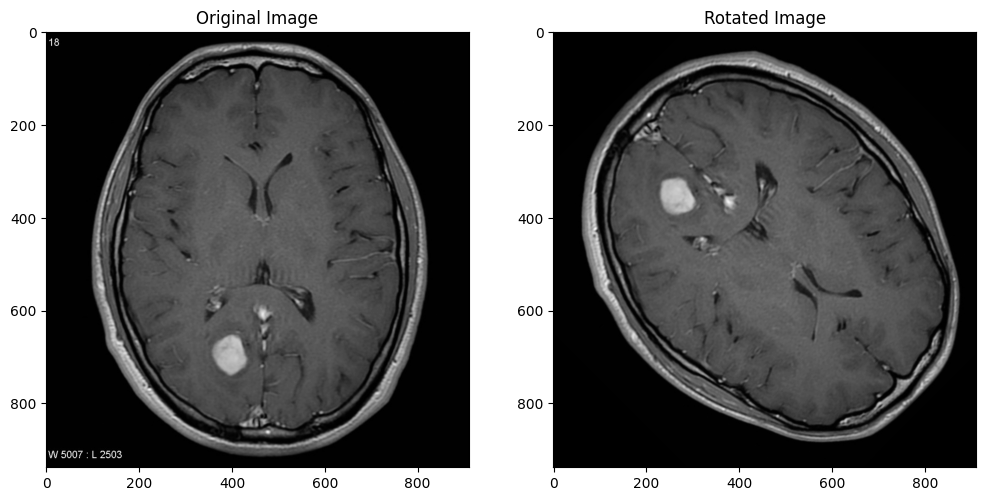

In [25]:
(h, w) = Vertical_flip.shape[ : 2]
center = (h//2, w//2)
angle = 45
scale = 1.0

matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(Vertical_flip, matrix, (w,h))

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image")

# **Zoom 30%**

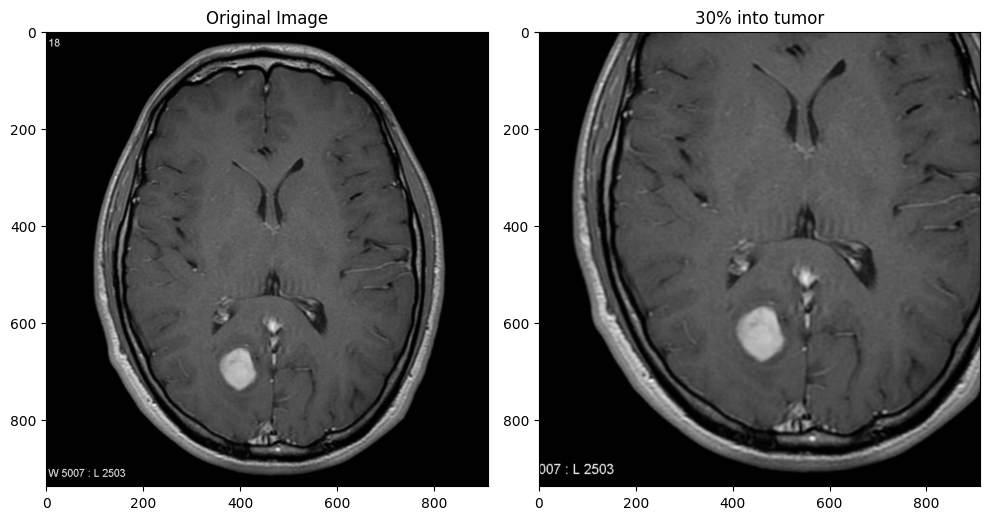

In [36]:
def zoom_bottom_left(image, zoom_factor=1.3):
    h, w = image.shape[:2]
    crop_h, crop_w = int(h / zoom_factor), int(w / zoom_factor)

    top = h - crop_h
    left = max(0, int(w * 0.05))

    cropped = image[top:top + crop_h, left:left + crop_w]

    zoomed_image = cv2.resize(cropped, (w, h), interpolation=cv2.INTER_LINEAR)
    return zoomed_image

zoomed_image = zoom_bottom_left(image, zoom_factor=1.3)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("30% into tumor")
plt.imshow(zoomed_image, cmap='gray')

plt.tight_layout()
plt.show()